# Two-dimenional Langevin Field-Theoretic Simulation

This script runs Langevin field-theoretic simulation (L-FTS) in two dimentional spaces with AB diblock copolymer systems adopting discrete chain model. Note that two-dimensional L-FTS has no physical meaning. This is only for the pedagogical purpose. 

1. L-FTS is a partial saddle-point approximation (PSPA) method that approximates the functional represention of the canonical partition function by evaluating the following equation:
\begin{align}
\mathcal{Z} \propto \int \exp(-\beta H[\{\Omega_i\},\{w_j\}]) \{\mathcal{D}\Omega_i\},
\end{align}
where $\{\Omega_i\}$ is a set of real fields and $\{\mathcal{D}\Omega_i\}$ are functional integrals over all real fields.

2. $\{w_j\}$ is a set of saddle-point solutions of imaginary fields.

\begin{align}
\left.\frac{\delta H[\{\Omega_i\}]}{\delta \Omega_j}\right|_{\Omega_j({\bf r})=w_j({\bf r})}=0
\end{align}

3. In L-FTS, the real fields are evolving according to the Langevin dynamics:
\begin{align}
\frac{\partial }{\partial \tau}\Omega_i({\bf r}, \tau) &= -λ_i \frac{\delta H[\{\Omega_i\},\{w_j\}]}{\delta \Omega_i({\bf r}, \tau)} + \eta({\bf r},\tau),  \ \ \ \ (\textrm{per monomer unit}) \\
\end{align}
with noise statistics $\left<\eta({\bf r},\tau)\right> = 0$, $\left<\eta({\bf r},\tau)\eta({\bf r'},\tau')\right> =2\lambda_i k_B T \delta({\bf r}-{\bf r}')\delta(t-t')$. 
<!-- For convinience, we choose $\lambda_i = \frac{\beta }{\rho_0}$. -->

4. In discretized version (first-order in $\tau$),
\begin{align}
\lambda_i &\rightarrow \frac{\beta}{\rho_0}\lambda_i \\
\Omega_i({\bf r}, \tau+\delta\tau) &= \Omega_i({\bf r}, \tau) -λ_i\frac{\beta}{\rho_0}\frac{\delta H[\{\Omega_i\},\{w_j\}]}{\delta \Omega_i({\bf r}, \tau)} \delta\tau + \sigma_i\mathcal{N}({\bf r}, \tau),  \ \ \ \ (\textrm{per monomer unit}) \\
\end{align}
where $\mathcal{N}$ is Gaussian noise with $\sigma_i^2 = \lambda_i\frac{2\delta\tau}{\Delta V \rho_0}$.

5. In 'per chain' unit,
\begin{align}
N\Omega_i &\rightarrow \Omega_i, \\
\Omega_i({\bf r}, \tau+\delta\tau) &= \Omega_i({\bf r}, \tau) -λ_i\frac{\beta}{C/R_0^3}\frac{\delta H[\{\Omega_i\},\{w_j\}]}{\delta \Omega_i({\bf r}, \tau)} \delta\tau N + \sigma_i\mathcal{N}({\bf r}, \tau),  \ \ \ \ (\textrm{per chain unit}) \\
\end{align}
where $\mathcal{N}$ is Gaussian noise with $\sigma_i^2 = \lambda_i\frac{2\delta\tau N^2}{\Delta V \rho_0}$.

6. The invariant polymerization index $\bar{N} = a^6\rho_0^2 N$. Then, $\sigma_i^2$ can be rewritten as
\begin{align}
\Delta V \rho_0 &= \frac{\Delta V}{(aN^{1/2})^3} N \sqrt{\bar{N}}, \\
\sigma_i^2 &= \lambda_i\frac{2\delta\tau N}{\frac{\Delta V}{(aN^{1/2})^3}\sqrt{\bar{N}}}.  \ \ \ \ (\textrm{per chain unit}) \\
\end{align}

##### Example 1) AB-type polymeric systems 

\begin{align}
\Omega_-({\bf r}, \tau+\delta\tau) &= \Omega_-({\bf r}, \tau) + \left[\Phi_-({\bf r},\tau) + \frac{2}{\chi}\Omega_-({\bf r},\tau)\right] \delta\tau + \sigma \mathcal{N}_\sigma({\bf r}, \tau),  \ \ \ \ (\textrm{per monomer unit}) \\
\end{align}

\begin{align}
\Omega_-({\bf r}, \tau+\delta\tau) &= \Omega_-({\bf r}, \tau) + \left[\Phi_-({\bf r},\tau) + \frac{2}{\chi N}\Omega_-({\bf r},\tau)\right] \delta\tau N + \sigma \mathcal{N}_\sigma({\bf r}, \tau)  \ \ \ \ (\textrm{per chain unit})
\end{align}

References :
* [Monte Carlo Field-Theoretic Simulations for Melts of Symmetric Diblock Copolymer](https://doi.org/10.1021/ma401687j)
* [Computationally Efficient Field-Theoretic Simulations for Block Copolymer Melts](https://doi.org/10.1021/acs.macromol.9b01904)
* [A multi-species exchange model for fully fluctuating polymer field theory simulations](https://aip.scitation.org/doi/pdf/10.1063/1.4900574)

### 1. Setting simulation parameters and initialization

Static simulation parameters:
\begin{align}
N &= 100 \\
\Delta s &= 1/N = 0.01 \\
R_0 & = bN^{1/2} \\
L_x &= 3.0 R_0 \\
L_y &= 3.0 R_0 \\
V &= L_x L_y \\ 
m_x &= 32 \\
m_y &= 32 \\
b_A/b &= 1.0 \\
b_B/b &= 1.0 \\  
\chi_b N &= 20 \\
\end{align}

Langevin dynamics parameters:
\begin{align}
\bar{N} &= 10000 \\
\Delta \tau N &= 0.1 \\
\end{align}


In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import polymerfts

# OpenMP environment variables
os.environ["MKL_NUM_THREADS"] = "1"  # always 1
os.environ["OMP_STACKSIZE"] = "1G"
os.environ["OMP_MAX_ACTIVE_LEVELS"] = "1"  # 0, 1
os.environ["OMP_NUM_THREADS"] = "2"  # 1 ~ 4

# GPU environment variables
os.environ["LFTS_GPU_NUM_BLOCKS"]  = "256"
os.environ["LFTS_GPU_NUM_THREADS"] = "256"
os.environ["LFTS_NUM_GPUS"] = "1" # 1 ~ 2

# Simulation parameters
nx = [32,32]                       # grid number
lx = [3.0,3.0]                     # box size
stat_seg_lengths = {"A":1.0,       # statistical segment lengths
                    "B":1.0}        
ds = 0.01                          # contour step interval
chi_n = {"A,B":20}                 # bare chi interaction parameter
monomer_types = ["A", "B"]         # monomer types

# Langevin dynamics parameters
nsteps = 1000                      # number of Langevin steps
dt   = 0.1                         # Langevin step interval, delta tau*N
nbar = 10000                       # invariant polymerization index
sigma = np.sqrt(2*dt*np.prod(nx)/(np.prod(lx)*np.sqrt(nbar))) # Langevin noise amplitude

# Select platform ("cuda" or "cpu-mkl") for real-valued simulations
reduce_gpu_memory_usage = False
factory = polymerfts.PlatformSelector.create_factory("cpu-mkl", reduce_gpu_memory_usage, "real")
factory.display_info()

# Create an instance for computation box
cb = factory.create_computation_box(nx, lx) 
# Create an instance for molecule information with block segment information and chain model ("continuous" or "discrete")
molecules = factory.create_molecules_information("discrete", ds, stat_seg_lengths)

# Add AB diblock copolymers
volume_fraction = 1.0
blocks = [["A", 0.5, 0, 1],   # monomer type, statistical segment length, start index, end index
          ["B", 0.5, 1, 2]]
molecules.add_polymer(volume_fraction, blocks)

# Optimizer to avoid redundant computations
aggregate_propagator_computation = True
propagator_computation_optimizer = factory.create_propagator_computation_optimizer(molecules, aggregate_propagator_computation)
propagator_computation_optimizer.display_blocks()
propagator_computation_optimizer.display_propagators()

# Create a solver
solver = factory.create_pseudospectral_solver(cb, molecules, propagator_computation_optimizer)

==================== MKL Version ====================
Major version:           2021
Minor version:           0
Update version:          4
Product status:          Product
Build:                   20210904
Platform:                Intel(R) 64 architecture
Processor optimization:  Intel(R) Architecture processors
--------------- Blocks ---------------
Polymer id, left key:
	aggregated, (left, right) is_junction, (left, right) n_segment, right key, n_repeat, {v, u} list

0, A:
	 X, (X, O), (50, 50), (B50)A, 1, {0,1}

0, B:
	 X, (X, O), (50, 50), (A50)B, 1, {2,1}
--------------- Propagators ---------------
Key:
	height, aggregated, max_n_segment, # dependencies, junction_ends
B:
	 0, X, 50, 0, {50}, 
A:
	 0, X, 50, 0, {50}, 
(B50)A:
	 1, X, 50, 1, {}, 
(A50)B:
	 1, X, 50, 1, {}, 
(Total number of integral equation steps (time complexity to compute propagators: 200
Total number of steps after optimizing computation : 200
Computational cost reduction (higher is better) : 0 %


### 2. Initial potential fields

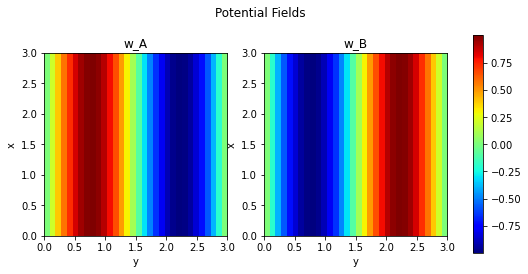

In [2]:
w_A =  np.tile(np.sin(np.linspace(0, 2*np.pi, nx[0])), (nx[1], 1))   # sinusoidal potential field for A
w_B = -np.tile(np.sin(np.linspace(0, 2*np.pi, nx[0])), (nx[1], 1))   # sinusoidal potential field for B
w = {"A": np.reshape(w_A, np.prod(nx)), "B": np.reshape(w_B, np.prod(nx))}  # potential field dictionary

# Plot each image with the same vmin and vmax
vmin = min(w_A.min(), w_B.min())
vmax = max(w_A.max(), w_B.max())

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
fig.suptitle("Potential Fields")
im = axes[0].imshow(w_A, extent=(0, lx[1], 0, lx[0]), origin='lower', cmap=cm.jet, vmin=vmin, vmax=vmax)
im = axes[1].imshow(w_B, extent=(0, lx[1], 0, lx[0]), origin='lower', cmap=cm.jet, vmin=vmin, vmax=vmax)
axes[0].set(title='w_A', xlabel='y', ylabel='x')
axes[1].set(title='w_B', xlabel='y', ylabel='x')

fig.subplots_adjust(right=1.0)
fig.colorbar(im, ax=axes.ravel().tolist())
fig.show()

### 3. Run L-FTS

The real fields are updated according to the Langevin dynamics: 
\begin{align}
\Omega_i({\bf r}, \tau+\delta\tau) &= \Omega_i({\bf r}, \tau) -λ_i\frac{\beta}{C/R_0^3}\frac{\delta H[\{\Omega_i\},\{w_j\}]}{\delta \Omega_i({\bf r}, \tau)} \delta\tau N + \sigma_i\mathcal{N}({\bf r}, \tau),  \ \ \ \ (\textrm{per chain unit}) \\
\end{align}

The imaginary fields are updated using the equations below: 
\begin{align}
\Omega_j({\bf r}, \tau+\delta\tau) &= \Omega_j({\bf r}, \tau) +λ_j\frac{\beta}{C/R_0^3}\frac{\delta H[\{\Omega_i\},\{\Omega_j\}]}{\delta \Omega_j({\bf r}, \tau)} \delta\tau N,  \ \ \ \ (\textrm{per chain unit}) \\
\end{align}

##### Example 1) AB-type polymeric systems 

The exchange field:
\begin{align}
\Omega_-({\bf r}, \tau+\delta\tau) &= \Omega_-({\bf r}, \tau) + λ_-\left[\phi_A({\bf r}) - \phi_B({\bf r}) + \frac{2}{\chi N}\Omega_-({\bf r},\tau)\right] \delta\tau N + \sigma \mathcal{N}_\sigma({\bf r}, \tau),  \ \ \ \ (\textrm{per chain unit}) \\
\end{align}

The pressure-like field:
\begin{align}
\Omega_+({\bf r}, \tau+\delta\tau) &= \Omega_+({\bf r}, \tau) + \lambda_+ \left[\phi_A({\bf r}) + \phi_B({\bf r}) - 1\right] \delta\tau N,  \ \ \ \ (\textrm{per chain unit}) \\
\end{align}


In [ ]:
# Convergence tolerance
tolerance = 1.0e-4  

# Fields update rates
lambda_minus = 1.0  
lambda_plus = 1.0

# The number of components
M = len(monomer_types)

# X (χN matrix) and its inverse
matrix_chi = np.array([
    [0, chi_n["A,B"]],
    [chi_n["A,B"], 0]]
)
matrix_chi_inv = np.linalg.inv(matrix_chi)

# P matrix for field residuals
matrix_p = np.identity(M) - np.matmul(np.ones((M,M)), matrix_chi_inv)/np.sum(matrix_chi_inv)

def compute_concentrations(w):
    # For the given fields, compute the polymer statistics
    solver.compute_propagators(w)
    solver.compute_concentrations()

    # Compute total concentration for each monomer type
    phi = {}
    for monomer_type in monomer_types:
        phi[monomer_type] = solver.get_total_concentration(monomer_type)

    return phi

def find_saddle_point(w_plus, w_minus):

    # Assign large initial value for error
    error_level = 1e20

    max_iter = 1000  # maximum number of iterations

    # Saddle point iteration begins here
    for saddle_iter in range(1, max_iter):
        
        # Compute total concentrations
        phi = compute_concentrations(w_aux)

        # Compute functional derivatives of Hamiltonian w.r.t. imaginary fields 
        h_deriv = mpt.compute_func_deriv(w_aux, phi, mpt.aux_fields_imag_idx)

        # Compute total error
        old_error_level = error_level
        error_level_array = np.std(h_deriv, axis=1)
        error_level = np.max(error_level_array)

        # Print iteration # and error levels
        if(error_level < tolerance or saddle_iter == max_iter):
        
            # Calculate Hamiltonian
            total_partitions = [solver.get_total_partition(p) for p in range(molecules.get_n_polymer_types())]
            hamiltonian = mpt.compute_hamiltonian(molecules, w_aux, total_partitions, include_const_term=True)

            # Check the mass conservation
            mass_error = np.mean(h_deriv[I-1])
            print("%8d %12.3E " % (saddle_iter, mass_error), end=" [ ")
            for p in range(self.molecules.get_n_polymer_types()):
                print("%13.7E " % (self.solver.get_total_partition(p)), end=" ")
            print("] %15.9f   [" % (hamiltonian), end="")
            for i in range(I):
                print("%13.7E" % (error_level_array[i]), end=" ")
            print("]")

        # Conditions to end the iteration
        if error_level < tolerance:
            break

        # Scaling h_deriv
        for count, i in enumerate(mpt.aux_fields_imag_idx):
            h_deriv[count] *= dt_scaling[i]

        # Calculate new fields using compressor (AM, LR, LRAM)
        w_aux[self.mpt.aux_fields_imag_idx] = np.reshape(self.compressor.calculate_new_fields(w_aux[self.mpt.aux_fields_imag_idx], -h_deriv, old_error_level, error_level), [I, self.cb.get_total_grid()])

    # Set mean of pressure field to zero
    w_aux[M-1] -= np.mean(w_aux[M-1])

        # w = {"A":w_plus+w_minus, "B":w_plus-w_minus}  # reset the fields

        # # Compute total concentration for each monomer type
        # phi = compute_concentrations(w)

        # # Calculate the total energy
        # total_partitions = [solver.get_total_partition(p) for p in range(molecules.get_n_polymer_types())]
        # # energy_total = 0.0
        # # for p in range(molecules.get_n_polymer_types()):
        # #     energy_total -= molecules.get_polymer(p).get_volume_fraction()/ \
        # #                     molecules.get_polymer(p).get_alpha() * \
        # #                     np.log(total_partitions[p])
        # # for i in range(M):
        # #     energy_total -= np.mean(w[monomer_types[i]]*phi[monomer_types[i]])
        # #     for j in range(M):
        # #         energy_total += 0.5*matrix_chi[i,j]*np.mean(phi[monomer_types[i]]*phi[monomer_types[j]])

        # # Calculate difference between current total density and target density
        # phi_total = np.zeros(cb.get_total_grid())
        # for i in range(M):
        #     phi_total += phi[monomer_types[i]]
        # phi_diff = phi_total-1.0

        # # # Calculate self-consistency error
        # # w_diff = np.zeros([M, cb.get_total_grid()], dtype=np.float64) # array for output fields
        # # for i in range(M):
        # #     for j in range(M):
        # #         w_diff[i,:] += matrix_chi[i,j]*phi[monomer_types[j]] - matrix_p[i,j]*w[monomer_types[j]]

        # # # Keep the level of functional derivatives
        # # for i in range(M):
        # #     w_diff[i] -= cb.integral(w_diff[i])/cb.get_volume()

        # # error_level measures the "relative distance" between the input and output fields
        # old_error_level = error_level
        # error_level = 0.0
        # error_normal = 1.0  # add 1.0 to prevent divergence
        # for i in range(M):
        #     error_level += cb.inner_product(w_diff[i],w_diff[i])
        #     error_normal += cb.inner_product(w[monomer_types[i]],w[monomer_types[i]])
        # error_level = np.sqrt(error_level/error_normal)

        # # Print iteration # and error levels and check the mass conservation
        # mass_error = cb.integral(phi_diff)/cb.get_volume()
        
        # print("%8d %12.3E " % (scft_iter, mass_error), end=" [ ")
        # for p in range(molecules.get_n_polymer_types()):
        #     print("%13.7E " % (solver.get_total_partition(p)), end=" ")
        # print("] %15.9f %15.7E " % (energy_total, error_level))

        # # Conditions to end the iteration
        # if error_level < tolerance:
        #     break

        # # Update fields using simple
        # for i in range(M):
        #     w[monomer_types[i]] += lambda_plus*w_diff[i]

# Compute concentrations
phi = compute_concentrations(w)

# Initialize auxiliary fields for Langevin dynamics
w_plus =  (w["A"]+w["B"])/2
w_minus = (w["A"]-w["B"])/2

# Langevin iteration begins here
for langevin_step in range(1, nsteps+1):
    print("Langevin step: ", langevin_step)

    # Compute functional derivatives of Hamiltonian w.r.t. exchange field
    w_lambda = phi["A"]-phi["B"] + 2(w["A"]-w["B"])/chi_n["A,B"]

    # Update w_aux using Leimkuhler-Matthews method
    normal_noise = np.random.normal(0.0, sigma, [M, cb.get_total_grid()])
    w_minus += -w_lambda*dt*lambda_minus + normal_noise*np.sqrt(lambda_minus)

    # Find saddle point of the pressure field
    print("iterations, mass error, total partitions, Hamiltonian, incompressibility error")
    phi, hamiltonian, saddle_iter, error_level = find_saddle_point(w_plus, w_minus)

### 4. Display the results

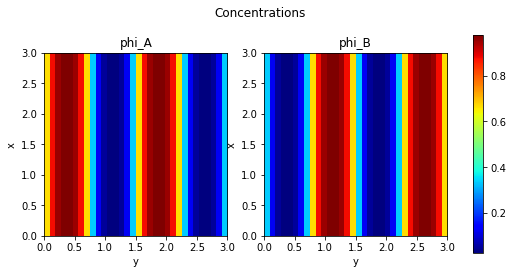

In [4]:
# Get the ensemble average concentration for each monomer type
phi_A = np.reshape(solver.get_total_concentration("A"), nx)
phi_B = np.reshape(solver.get_total_concentration("B"), nx)

# Plot each image with the same vmin and vmax
vmin = min(phi_A.min(), phi_B.min())
vmax = max(phi_A.max(), phi_B.max())

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
fig.suptitle("Concentrations")
im = axes[0].imshow(phi_A, extent=(0, lx[1], 0, lx[0]), origin='lower', cmap=cm.jet, vmin=vmin, vmax=vmax)
im = axes[1].imshow(phi_B, extent=(0, lx[1], 0, lx[0]), origin='lower', cmap=cm.jet, vmin=vmin, vmax=vmax)
axes[0].set(title='phi_A', xlabel='y', ylabel='x')
axes[1].set(title='phi_B', xlabel='y', ylabel='x')

fig.subplots_adjust(right=1.0)
fig.colorbar(im, ax=axes.ravel().tolist())
fig.show()